In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
#from fastai.transforms import *
from fastai.conv_learner import *
#from fastai.model import *
#from fastai.dataset import *
#from fastai.sgdr import *
#from fastai.plots import *

In [3]:
PATH = "./"
IMG_PATH = Path('../data/PPMI_MRI/')

In [4]:
import nibabel as nib
import pydicom
import glob
import os
import numpy
import seaborn as sns
from itertools import chain
from skimage.transform import resize
from tensorboardX import SummaryWriter

In [5]:

lstFilesDCM = []  # create an empty list
'''for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))'''

'for dirName, subdirList, fileList in os.walk(PathDicom):\n    for filename in fileList:\n        if ".dcm" in filename.lower():  # check whether the file\'s DICOM\n            lstFilesDCM.append(os.path.join(dirName,filename))'

In [6]:
df = pd.read_csv(IMG_PATH / 'df_mri.csv')

In [7]:
df.head()

,Image Data ID,Group,Sex,Age,Subject,MDP_UPDRS III,NHY,Acq Date,Filenames,is_F,is_M
0,370798,0,M,64,4018,8,0,2012-02-13,./../data/PPMI_MRI/dat_mri_T1_gz 4/PPMI_4018_M...,0.0,1.0
1,406791,1,M,61,3118,17,2,2013-01-23,./../data/PPMI_MRI/dat_mri_T1_gz 2/PPMI_3118_M...,0.0,1.0
2,428747,1,M,49,3787,12,2,2013-10-30,./../data/PPMI_MRI/dat_mri_T1_gz 2/PPMI_3787_M...,0.0,1.0
3,371034,1,M,77,3826,15,1,2012-08-21,./../data/PPMI_MRI/dat_mri_T1_gz 3/PPMI_3826_M...,0.0,1.0
4,330968,0,M,52,3300,0,0,2011-01-18,./../data/PPMI_MRI/dat_mri_T1_gz 2/PPMI_3300_M...,0.0,1.0


In [8]:
from sklearn.preprocessing import MinMaxScaler

scalea = MinMaxScaler()

print(scalea.fit(df['Age'].values.reshape(-1,1)))

df['age_scale'] = scalea.transform(df['Age'].values.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))


/home/brainvistec4/miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
from sklearn.model_selection import train_test_split
X_train_tmp, X_test_tmp, param_train_tmp, param_test_tmp, y_train_tmp, y_test_tmp = train_test_split(df, df[['is_F','is_M','age_scale']], df['Group'], test_size=0.2)

from sklearn.model_selection import train_test_split
X_train_tmp, X_val_tmp, param_train_tmp, param_val_tmp, y_train_tmp, y_val_tmp = train_test_split(X_train_tmp, param_train_tmp, y_train_tmp, test_size=0.3)

In [10]:
lstFilesDCM_train = []  # create an empty list
lstFilesDCM_test = []
lstFilesDCM_val = []
lstFilesDCM_train = X_train_tmp['Filenames'].values
lstFilesDCM_train = lstFilesDCM_train.tolist()
lstFilesDCM_test = X_test_tmp['Filenames'].values
lstFilesDCM_test = lstFilesDCM_test.tolist()
lstFilesDCM_val = X_val_tmp['Filenames'].values
lstFilesDCM_val = lstFilesDCM_val.tolist()

For NORMAL Image

In [11]:
#Training Set

In [53]:
img = nib.load(lstFilesDCM_train[66])

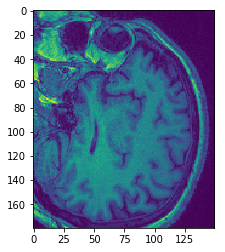

In [54]:
mri = plt.imshow(img.get_fdata()[122,40:220,80:230])

In [52]:
plt.imshow(resize(mri, (128, 120), anti_aliasing=True))

NameError: name 'mri' is not defined

/home/brainvistec4/miniconda3/envs/fastai/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


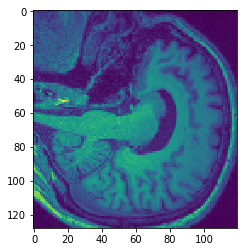

In [71]:
plt.imshow(resize(img.get_fdata()[80,40:230,60:230], (128, 120), anti_aliasing=True))

In [11]:
# loop through all the DICOM files
image_array_train =[]

for index,filenameDCM in enumerate(zip(lstFilesDCM_train,lstFilesDCM_val)):
    for j in range(0,2):
        ds = nib.load(filenameDCM[j])
        #ds_3d = resize(ds.get_fdata()[120,40:230,60:230], (64, 60), mode='constant', anti_aliasing=True)
        for i in range(25,146):
            ds_3d = resize(ds.get_fdata()[i,40:230,60:230], (64, 60),mode='constant', anti_aliasing=True)

            image_array_train.append(ds_3d)

image_array_train = np.asarray(image_array_train, dtype='float64')
image_array_train = image_array_train/1278.008826530314
#image_array_train = image_array_train.reshape(len(lstFilesDCM_train),41,64,60)
image_array_train.shape

(26862, 64, 60)

In [12]:
# loop through all the DICOM files
image_array_test =[]

for filenameDCM in lstFilesDCM_test:
    ds = nib.load(filenameDCM)
    #ds_3d = resize(ds.get_fdata()[120,40:230,60:230], (64, 60), mode='constant', anti_aliasing=True)
    for i in range(25,146):
        ds_3d = resize(ds.get_fdata()[i,40:230,60:230], (64, 60),mode='constant', anti_aliasing=True)

        image_array_test.append(ds_3d)

image_array_test = np.asarray(image_array_test, dtype='float64')
image_array_train = image_array_train/1278.008826530314
#image_array_train = image_array_train.reshape(len(lstFilesDCM_train),41,64,60)
image_array_test.shape

(11132, 64, 60)

In [12]:
#Validation set

In [13]:
image_array_val =[]

for filenameDCM in lstFilesDCM_val:
    ds = nib.load(filenameDCM)
    ds_3d = resize(ds.get_fdata()[25,40:230,60:230], (64, 60), mode='constant', anti_aliasing=True)
    for i in range(28,146,3):
        ds_3d = np.dstack((ds_3d,resize(ds.get_fdata()[i,40:230,60:230], (64, 64),mode='constant', anti_aliasing=True)))
    image_array_val.append(ds_3d)

image_array_val = np.asarray(image_array_val, dtype='float64')
image_array_val = image_array_val/1278.008826530314
image_array_val = image_array_val.reshape(len(lstFilesDCM_val),41,64,60)
image_array_val.shape

(111, 41, 128, 120)

In [ ]:
#Test set

In [ ]:
image_array_test =[]

for filenameDCM in lstFilesDCM_test:
    ds_3d = resize(ds.get_fdata()[25,30:210,50:200], (128, 120), mode='constant', anti_aliasing=True)
    for i in range(28,146,3):
        ds_3d = np.dstack((ds_3d,resize(ds.get_fdata()[i,30:210,50:200], (128, 120),mode='constant', anti_aliasing=True)))

    image_array_test.append(ds_3d)

image_array_test = np.asarray(image_array_test, dtype='float64')
image_array_test = image_array_test / 1278.008826530314
image_array_test = image_array_test.reshape(len(lstFilesDCM_test),41,64,60)
image_array_test.shape

In [44]:
(1433.46+1741.31+659.256479590942 )/3

1278.008826530314

In [18]:
y_train = y_train_tmp.values
y_train = y_train.astype('int64')
#y_train = np.hstack((y_train,y_train,y_train))
#y_train = np.hstack((y_train,y_train))
#y_val = y_val_tmp.values
#y_val = y_val.astype('int64')
#y_val= np.hstack((y_val,y_val,y_val))
#y_test = y_test_tmp.values
#y_test = y_test.astype('int64')
#y_val= np.hstack((y_val,y_val,y_val))

### Load dataset

In [13]:
bs = 16

In [14]:
X_train = torch.utils.data.DataLoader(image_array_train, batch_size=bs)
#param_train = torch.utils.data.DataLoader(param_train, batch_size=4)
#y_train = torch.utils.data.DataLoader(y_train, batch_size=bs)
#X_val = torch.utils.data.DataLoader(image_array_val, batch_size=4)
#param_val = torch.utils.data.DataLoader(param_val, batch_size=4)
#y_val = torch.utils.data.DataLoader(y_val, batch_size=4)
X_test = torch.utils.data.DataLoader(image_array_test, batch_size=bs)
#param_test = torch.utils.data.DataLoader(param_test, batch_size=1)
#y_test = torch.utils.data.DataLoader(y_test, batch_size=1)

#del(image_array_train,image_array_val)
#del(image_array_train,image_array_val,image_array_test)
#del(X_train_tmp,X_val_tmp,X_test_tmp,y_train_tmp,y_val_tmp,y_test_tmp,param_train_tmp,param_val_tmp,param_test_tmp)

## Sparse Autoencoder

In [15]:
from torch.autograd import Function

In [16]:
class L1penalty(Function):
    
    @staticmethod
    def forward(ctx, input, l1weight):
        ctx.save_for_backward(input)
        ctx.l1weight = l1weight
        return input
    
    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = input.clone().sign().mul(ctx.l1weight)
        grad_input += grad_output
        return grad_input, None
        

In [89]:
class init_weights(Function):
    
    @staticmethod
    def init_weights(self, m):
        if type(m) == nn.Linear:
            torch.nn.init.xavier_uniform(m.weight)
            m.bias.data.fill_(0.01)

In [146]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder,self).__init__()
        self.LinearEncoder = nn.Linear(64*60,1200)
        self.encoder = nn.Sequential(self.LinearEncoder,
            nn.ReLU())
        self.LinearDecoder = nn.Linear(1200,64*60)
        self.decoder = nn.Sequential(self.LinearDecoder,
            nn.Sigmoid())
        self.LinearEncoder.apply(init_weights)
        self.LinearDecoder.apply(init_weights)
        
    def init_weight(self,x):
        self.init_weightsE = copy.deepcopy(self.encoder(x).weight.data)
        self.init_weightsD = copy.deepcopy(self.decoder(x).weight.data)
        self.LinearEncoder.apply(init_weightsE)
        self.LinearDecoder.apply(init_weightsD)
        
    def forward(self,x):
        x = self.encoder(x)
        x = L1penalty.apply(x,0.01)
        x = self.decoder(x)
        return x
 


In [147]:
net = autoencoder()
print(net)
net.double()

autoencoder(
  (LinearEncoder): Linear(in_features=3840, out_features=1200, bias=True)
  (encoder): Sequential(
    (0): Linear(in_features=3840, out_features=1200, bias=True)
    (1): ReLU()
  )
  (LinearDecoder): Linear(in_features=1200, out_features=3840, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=1200, out_features=3840, bias=True)
    (1): Sigmoid()
  )
)


autoencoder(
  (LinearEncoder): Linear(in_features=3840, out_features=1200, bias=True)
  (encoder): Sequential(
    (0): Linear(in_features=3840, out_features=1200, bias=True)
    (1): ReLU()
  )
  (LinearDecoder): Linear(in_features=1200, out_features=3840, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=1200, out_features=3840, bias=True)
    (1): Sigmoid()
  )
)

In [148]:
optimizer = optim.Adam(net.parameters(), lr = 1e-4)
criterion = nn.MSELoss().cuda()
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.99)

In [156]:
net.LinearEncoder.weight.data

tensor(1.00000e-02 *
       [[ 0.9182, -1.4737,  0.5924,  ..., -1.0472,  0.7980,  0.2730],
        [ 1.4896,  0.5062,  1.3919,  ...,  0.0697, -0.5974, -1.1574],
        [ 0.3677,  0.4199,  1.2471,  ...,  1.3350,  0.8144, -0.0496],
        ...,
        [-0.7227, -0.6039,  1.1886,  ...,  0.9316,  1.0575, -0.4070],
        [-0.9939,  0.3483,  1.1216,  ...,  0.9146,  0.5259, -0.7293],
        [-1.0426,  1.2053,  0.7972,  ..., -0.1028,  0.4321,  1.5740]], dtype=torch.float64, device='cuda:0')

In [149]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"
net.to(device)
print(device)

cuda:0


## Training

In [152]:
def train_encoder(niter):
    dataiter = iter(X_test)
    images = dataiter.next()
    criterion = nn.MSELoss().cuda()
    no_image = int(niter/10)
    printImg = torch.Tensor(no_image,2,1,64,60)
    for epoch in range(niter):  # loop over the dataset multiple times
        runningLoss = 0.0
        net.train(True)
        scheduler.step()
        for x in X_train:

            x = x.to(device)
            x = x.view(-1,64*60)
 


            net.zero_grad()  # zeroes the gradient buffers of all parameters
            net.init_weight(x)
            outputs = net(x) # forward 
            
            loss = criterion(outputs, x) # calculate loss
            loss.backward() #  backpropagate the loss
            for param in optimizer.param_groups[0]['params']:
                    param.data = param.data.add(-0.0001 * optimizer.param_groups[0]['lr'], param.data)
            
            
            #for f in net.parameters():
            #    f.data.sub_(f.grad.data * 1e-3) # weight = weight - learning_rate * gradient #(Update Weights)
            optimizer.step()
            runningLoss += loss.item()
            
        print('At Iteration : %d / %d  ;  Mean-Squared Error : %f'%(epoch + 1,niter,runningLoss/(len(X_train)/bs)))
        
        if epoch%10 == 0:
            outImg = net(x[0].view(-1,64*60).double().cuda())
            outImg = outImg.view(-1,64,60).cpu()

            dispImg = torch.Tensor(2,1,64,60)
            dispImg[0] = x[0].view(64,60)
            dispImg[1] = outImg
            printImg[int(epoch/10)] = dispImg
        
    print('Finished Training')
    
    return printImg

In [153]:
 TT = train_encoder(10)

AttributeError: 'Tensor' object has no attribute 'weight'

In [140]:
TT.size()

torch.Size([1, 2, 1, 64, 60])

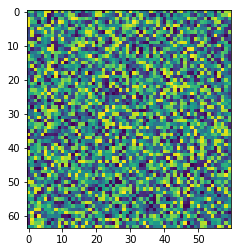

In [145]:
plt.imshow(TT[0,1].detach().numpy().reshape(64,60))

In [ ]:
model_save_path = './weights/'

In [ ]:
torch.save(net.state_dict(),f'{model_save_path}sparse_6460.pth')

In [68]:
def test_encoder():
    no_image = len(X_test)
    criterion = nn.MSELoss().cuda()
    printImg = torch.Tensor(no_image,2,1,64,60)
    
    net.eval()
    with tqdm(total=len(X_test)) as pbar:
        with torch.no_grad():
                for index,x in enumerate(X_test):
                    x = x.to(device)
                    x = x.view(-1,64*60)

                    outputs = net(x) # forward 
                    loss = criterion(outputs, x) # calculate loss

                    #print('Loss : %f'%(len(X_test)/bs))

                    outImg = net(x[0].view(-1,64*60).double().cuda())
                    outImg = outImg.view(-1,64,60).cpu()
                    dispImg = torch.Tensor(2,1,64,60)
                    dispImg[0] = x[0].view(64,60)
                    dispImg[1] = outImg
                    printImg[index] = dispImg

    print('Finished Test')

    return printImg

In [69]:
TEST = test_encoder()

  0%|          | 0/696 [00:00<?, ?it/s]
Finished Test


In [71]:
TEST.size()

torch.Size([696, 2, 1, 64, 60])

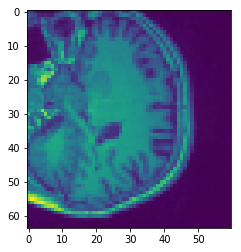

In [73]:
plt.imshow(TEST[600,0].detach().numpy().reshape(64,60))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


25704


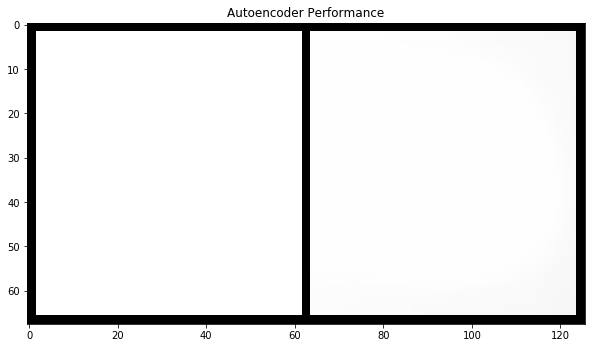

In [96]:
imshow(torchvision.utils.make_grid(TT[0]),'Autoencoder Performance')

In [95]:
# functions to show an image
def imshow(img, strlabel):
    npimg = img.detach().numpy()
    npimg = np.abs(npimg)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.figure()
    plt.title(strlabel)
    print(npimg.size)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
np.transpose

In [101]:
x = np.ones((1,2,3))

In [103]:
x.shape

(1, 2, 3)

In [65]:
for i in range(niter/10):
    imshow(torchvision.utils.make_grid(printImg[i]), 'Autoencoder Performance')

NameError: name 'niter' is not defined

### Darknet

In [22]:
def conv_layer(ni, nf, ks=3, stride=1):
    return nn.Sequential(
        nn.Conv3d(ni, nf, kernel_size=ks, bias=False, stride=stride, padding=ks//2),
        nn.BatchNorm3d(nf, momentum=0.01),
        nn.LeakyReLU(negative_slope=0.1, inplace=False))

class ResLayer(nn.Module):
    def __init__(self, ni):
        super().__init__()
        self.conv1=conv_layer(ni, ni//2, ks=1)
        self.conv2=conv_layer(ni//2, ni, ks=3)
        
    def forward(self, x): return x.add_(self.conv2(self.conv1(x.clone())))

class Darknet(nn.Module):
    def make_group_layer(self, ch_in, num_blocks, stride=1):
        return [conv_layer(ch_in, ch_in*2,stride=stride)
               ] + [(ResLayer(ch_in*2)) for i in range(num_blocks)]

    def __init__(self, num_blocks, num_classes, nf=32):
        super().__init__()
        features = [conv_layer(1, nf, ks=3, stride=1)]
        for i,nb in enumerate(num_blocks):
            features += self.make_group_layer(nf, nb, stride=2-(i==1))
            nf *= 2                        
        features += [nn.AdaptiveAvgPool3d(1),nn.Dropout(p=0.6), Flatten()]        
        self.features = nn.Sequential(*features)
        fc1 = [nn.Linear(286, 70),nn.BatchNorm1d(70), nn.LeakyReLU(negative_slope=0.1, inplace=False)]
        self.fc1 = nn.Sequential(*fc1)
        self.layers = nn.Sequential(nn.Linear(70,1))
        
    def forward(self, x, y):
        x = x.unsqueeze(1)
        x1 = self.features(x)
        x = torch.cat((x1,y[:,:,0],y[:,:,1],y[:,:,2]),1)
        x = self.fc1(x)
        x = F.dropout(x, p=0.6, training=self.training)        
        return self.layers(x)


In [23]:
model_save_path = './weights/'

In [24]:
m = Darknet([1,2,2], num_classes=1, nf=32)
m.double()

#m = nn.DataParallel(m, [1,2,3])
#m.load_state_dict(torch.load(f'{model_save_path}MRI_binary.pth'))

Darknet(
  (features): Sequential(
    (0): Sequential(
      (0): Conv3d(1, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (1): BatchNorm3d(32, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (0): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
      (1): BatchNorm3d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
    )
    (2): ResLayer(
      (conv1): Sequential(
        (0): Conv3d(64, 32, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
        (1): BatchNorm3d(32, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.1)
      )
      (conv2): Sequential(
        (0): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.

In [25]:
optimizer = optim.Adam(m.parameters(), lr = 1e-4)
criterion = nn.BCEWithLogitsLoss().cuda()
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.8)

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"
m.to(device)
print(device)

cuda:0


### Train

In [27]:
losslog=[]
vallog=[]

In [28]:
writer = SummaryWriter()
total_iter=0

In [29]:
def train(niter):
    for epoch in trange(niter):  # loop over the dataset multiple times
        running_loss = 0.0        
        global total_iter
        m.train(True)
        scheduler.step()
        with tqdm(total=len(X_train)) as pbar:
            iterloss=[]
            for i, (x, p, y) in enumerate(zip(X_train,param_train,y_train)):
                x,p,y = x.to(device), p.to(device),y.to(device)

                #i += 1
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = m(x.double(),p.double())
                loss = criterion(outputs,y.double().unsqueeze(1))
                
                loss.backward()
                for param in optimizer.param_groups[0]['params']:
                    param.data = param.data.add(-0.0001 * optimizer.param_groups[0]['lr'], param.data)
                optimizer.step()

                pbar.update()

                # print statistics
                losslog=[]

                running_loss += loss.item()
                if i % 20 == 19:    # print every 20 mini-batches
                    print('[%d, %5d]  Train BCElogits loss: %.3f' %
                          (epoch + 1, i + 1, running_loss / 20))
                    losslog.append(running_loss/20)
                    iterloss.append(running_loss/20)
                    running_loss = 0.0
            total_iter +=1
            print(iterloss)
            writer.add_scalar("Trainloss", sum(iterloss)/len(X_train) , total_iter)   
            #Eval
        m.eval()
        with tqdm(total=len(X_val)) as pbar:
            with torch.no_grad():
                truth = []
                predicted =[]
                correct = 0
                total = 0
                for i, ( x, p, y) in enumerate(zip(X_val,param_val,y_val)):
                    x,p,y = x.to(device), p.to(device),y.to(device)

                    # forward + backward + optimize
                    outputs = m(x,p)
                    loss = criterion(outputs,y.double().unsqueeze(1))
                    pred = (F.sigmoid(outputs))
                    corr=[]
                    for i in pred:
                        if i >= 0.74: corr.append(1)
                        else: corr.append(0)
                    total += y.size(0)
                    correct += (corr == y.cpu().numpy()).sum()
                    predicted.append(pred)
                    truth.append(y)
                    pbar.update()
                
                valloss = loss.item()
                vallog.append(valloss)
                print(f'BCELogitsLoss: {valloss}')
                print('Accuracy of the network on the val images: %d %%' % (100 * correct / total))
                #cmat = confusion_matrix(truth, predicted)
            
    print('Finished Training')
    return vallog, truth, predicted

In [30]:
torch.backends.cudnn.benchmark=True

In [ ]:
TT = train(5)

100%|██████████| 64/64 [05:19<00:00,  4.85s/it][0.7171129551700144, 0.6904312393298548, 0.7220713053023822]

100%|██████████| 28/28 [00:40<00:00,  2.25s/it]BCELogitsLoss: 0.7335313130608739
Accuracy of the network on the val images: 21 %

100%|██████████| 64/64 [05:09<00:00,  4.85s/it][0.6887507080477298, 0.7077397724426762, 0.7241288400543993]

100%|██████████| 28/28 [00:37<00:00,  1.25s/it]BCELogitsLoss: 0.7284646253849713
Accuracy of the network on the val images: 21 %

 59%|█████▉    | 38/64 [03:02<02:04,  4.80s/it]

In [63]:
TT

([0.11403440900275641,
  0.1485252785570889,
  0.19230404373504698,
  0.08148138027230205,
  0.0958140507163761,
  0.1295440573449759,
  0.15135945497486808,
  0.2281101268080259],
 [tensor([ 0,  1,  0,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  0,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  0,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  0,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  0], device='cuda:0'),
  tensor([ 1,  1,  0,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  0], device='cuda:0'),
  tensor([ 0,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  0,  1,  1], device='cuda:0'),
  tensor([ 0,  1,  1,  0], device='cuda:0'),
  tensor([ 0,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  0,  0], device='cuda:0'),
  tensor([ 0,  0,  0,  1], device='cuda:0'),
  tensor([ 1,  1,  0,  1], device='cuda:0'),
  tensor(

In [30]:
def eval():
    m.eval()
    with tqdm(total=len(X_val)) as pbar:
        with torch.no_grad():
            truth = []
            predicted =[]
            correct = 0
            total = 0
            for i, ( x, p, y) in enumerate(zip(X_val,param_val,y_val)):
                x,p,y = x.to(device), p.to(device),y.to(device)

                # forward + backward + optimize
                outputs = m(x,p)
                loss = criterion(outputs,y.double().unsqueeze(1))
                pred = (F.sigmoid(outputs))
                corr=[]
                for i in pred:
                    if i > 0.745: corr.append(1)
                    else: corr.append(0)
                total += y.size(0)
                correct += (corr == y.cpu().numpy()).sum()
                predicted.append(pred)
                truth.append(y)
                pbar.update()

            valloss = loss.item()
            vallog.append(valloss)
            print(f'BCELogitsLoss: {valloss}')
            print('Accuracy of the network on the val images: %d %%' % (100 * correct / total))
            #cmat = confusion_matrix(truth, predicted)
    return truth,predicted

In [31]:
E = eval()

100%|██████████| 28/28 [00:33<00:00,  1.11s/it]BCELogitsLoss: 0.31850778498760074
Accuracy of the network on the val images: 45 %



In [32]:
E

([tensor([ 0,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 0,  0,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  0,  0], device='cuda:0'),
  tensor([ 1,  0,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  0,  1], device='cuda:0'),
  tensor([ 0,  1,  1,  0], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  0,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  0], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  0,  0,  0], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  0,  0], device='cuda:0'),
  tensor([ 0,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  0,  0,  1], device='cuda:0'),
  tensor([

In [27]:
TT

([2.570730845519158,
  0.7914392462972939,
  0.7879431085214081,
  0.7003272213747094,
  0.7048353211055164,
  0.7482781020972599,
  0.6387455300977486,
  0.6976357225520363,
  0.6948410098786882],
 [0.6680567617870167, 0.798766416920424, 0.6625580501682401],
 [tensor([ 1,  1,  0,  1], device='cuda:0'),
  tensor([ 1,  1,  0,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 0,  1,  1,  1], device='cuda:0'),
  tensor([ 0,  0,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  0,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  0,  1], device='cuda:0'),
  tensor([ 0,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  0,  1], device='cuda:0'),
  tensor([ 0,  0,  0,  1], device='cuda:0'),
  tensor([ 1,  0,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  1], device='cuda:0'),
  tensor([ 1,  1,  1,  0], device='cuda:0'),
  tensor([ 1,  1,  1

In [36]:
vallog

[0.6176226071886851,
 0.23291864656920488,
 0.22714647616406325,
 0.16792641840431374,
 0.24506171977706248,
 0.26629779214120086,
 0.24861111154129753,
 0.21988045767115436]

### 128x120

In [9]:
# loop through all the DICOM files
image_array_train =[]

for filenameDCM in lstFilesDCM_train:
    ds = nib.load(filenameDCM)
    mri = ds.get_fdata().swapaxes(-2,-1)[25,::-1,::-1]
    ds_3d = resize(mri, (128, 120), mode='constant', anti_aliasing=True)
    for i in range(26,146):
        mri = ds.get_fdata().swapaxes(-2,-1)[i,::-1,::-1]
        ds_3d = np.dstack((ds_3d,resize(mri, (128, 120),mode='constant', anti_aliasing=True)))

    image_array_train.append(ds_3d)

image_array_train = np.asarray(image_array_train, dtype='float64')
image_array_train = image_array_train.reshape(len(lstFilesDCM_train),121,128,120)
image_array_train.shape

(256, 121, 128, 120)

In [10]:
image_array_val =[]

for filenameDCM in lstFilesDCM_val:
    ds = nib.load(filenameDCM)
    mri = ds.get_fdata().swapaxes(-2,-1)[25,::-1,::-1]
    ds_3d = resize(mri, (128, 120), mode='constant', anti_aliasing=True)
    for i in range(26,146):
        mri = ds.get_fdata().swapaxes(-2,-1)[i,::-1,::-1]
        ds_3d = np.dstack((ds_3d,resize(mri, (128, 120),mode='constant', anti_aliasing=True)))

    image_array_val.append(ds_3d)

image_array_val = np.asarray(image_array_val, dtype='float64')
image_array_val = image_array_val.reshape(len(lstFilesDCM_val),121,128,120)
image_array_val.shape



(111, 121, 128, 120)

In [64]:
X_train = torch.utils.data.DataLoader(image_array_train, batch_size=4)
X_val = torch.utils.data.DataLoader(image_array_val, batch_size=4)


In [65]:
TT = train(1)

  0%|          | 0/64 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1524586445097/work/aten/src/THC/generic/THCStorage.cu:58

In [79]:
writer.export_scalars_to_json("./log1.json")
writer.close()

## Validate

In [67]:
def test():
    with torch.no_grad():
        n = len(X_test)
        m.eval()
        predicted = []
        correct = 0
        total = 0
        with tqdm(total=len(X_test)) as pbar:
            with torch.no_grad():
                truth = []
                predicted =[]
                correct = 0
                total = 0
                for i, ( x, p, y) in enumerate(zip(X_test,param_test,y_test)):
                    x,p,y = x.to(device), p.to(device),y.to(device)

                    # forward + backward + optimize
                    outputs = m(x,p)
                    pred = (outputs>=0).long().view(-1)
                    total += y.size(0)
                    correct += (pred == y).sum()
                    predicted.append(pred)
                    truth.append(y)
                    pbar.update()
    
    print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))
    return predicted, truth

In [68]:
TEST = test()

  0%|          | 0/92 [00:00<?, ?it/s]
Accuracy of the network on the test images: 28 %


In [69]:
for i,j in enumerate(zip(TEST,y_test)):
    print(i,j)

0 (tensor([ 0], device='cuda:0'), tensor([ 1]))
1 (tensor([ 0], device='cuda:0'), tensor([ 1]))
2 (tensor([ 0], device='cuda:0'), tensor([ 1]))
3 (tensor([ 0], device='cuda:0'), tensor([ 1]))
4 (tensor([ 0], device='cuda:0'), tensor([ 0]))
5 (tensor([ 0], device='cuda:0'), tensor([ 1]))
6 (tensor([ 0], device='cuda:0'), tensor([ 1]))
7 (tensor([ 0], device='cuda:0'), tensor([ 0]))
8 (tensor([ 0], device='cuda:0'), tensor([ 0]))
9 (tensor([ 0], device='cuda:0'), tensor([ 0]))
10 (tensor([ 0], device='cuda:0'), tensor([ 0]))
11 (tensor([ 0], device='cuda:0'), tensor([ 1]))
12 (tensor([ 0], device='cuda:0'), tensor([ 1]))
13 (tensor([ 0], device='cuda:0'), tensor([ 0]))
14 (tensor([ 0], device='cuda:0'), tensor([ 1]))
15 (tensor([ 0], device='cuda:0'), tensor([ 1]))
16 (tensor([ 0], device='cuda:0'), tensor([ 0]))
17 (tensor([ 0], device='cuda:0'), tensor([ 0]))
18 (tensor([ 0], device='cuda:0'), tensor([ 1]))
19 (tensor([ 0], device='cuda:0'), tensor([ 1]))
20 (tensor([ 0], device='cuda:

In [43]:
model_save_path = './weights/'

In [43]:
torch.save(m.state_dict(),f'{model_save_path}MRI_binary.pth')

In [99]:
#m = Darknet([1,2,4,6,3], num_classes=1, nf=32)
#m.double()
m.load_state_dict(torch.load(f'{model_save_path}MRI_binary.pth'))

In [96]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)
print(device)

cuda:0


In [81]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)>

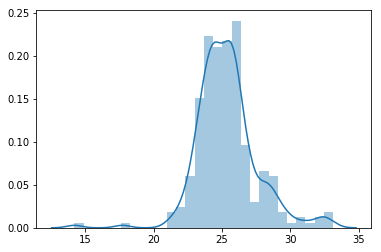

In [117]:
sns.distplot(y_pred)

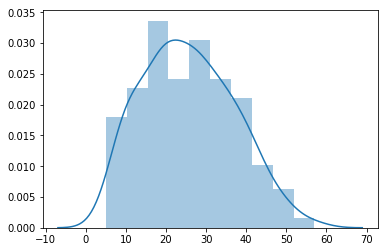

In [118]:
sns.distplot(y_test)

## MultiLabel

In [56]:
def conv_layer(ni, nf, ks=3, stride=1):
    return nn.Sequential(
        nn.Conv2d(ni, nf, kernel_size=ks, bias=False, stride=stride, padding=ks//2),
        nn.BatchNorm2d(nf, momentum=0.01),
        nn.LeakyReLU(negative_slope=0.1, inplace=False))

class ResLayer(nn.Module):
    def __init__(self, ni):
        super().__init__()
        self.conv1=conv_layer(ni, ni//2, ks=1)
        self.conv2=conv_layer(ni//2, ni, ks=3)
        
    def forward(self, x): return x.add_(self.conv2(self.conv1(x.clone())))

class Darknet(nn.Module):
    def make_group_layer(self, ch_in, num_blocks, stride=1):
        return [conv_layer(ch_in, ch_in*2,stride=stride)
               ] + [(ResLayer(ch_in*2)) for i in range(num_blocks)]

    def __init__(self, num_blocks, num_classes, nf=32):
        super().__init__()
        features = [conv_layer(1, nf, ks=3, stride=1)]
        for i,nb in enumerate(num_blocks):
            features += self.make_group_layer(nf, nb, stride=2-(i==1))
            nf *= 2                        
        features += [nn.AdaptiveAvgPool2d(1), Flatten()]        
        self.features = nn.Sequential(*features)
        fc1 = [nn.Linear(1054, 120), nn.BatchNorm1d(120, momentum=0.01), nn.LeakyReLU(negative_slope=0.1, inplace=False)]
        self.fc1 = nn.Sequential(*fc1)
        self.layers = nn.Sequential(nn.Linear(120,num_classes))
        
    def forward(self, x, y):
        x = x.unsqueeze(1)
        x1 = self.features(x)
        x = torch.cat((x1,y[:,:,0],y[:,:,1],y[:,:,2]),1)
        x = self.fc1(x)
        x = F.relu(x)
        #x = F.dropout(x, p=0.2, training=self.training)
        return F.log_softmax(self.layers(x), dim=-1)

In [57]:
ml = Darknet([1,2,4,6,3], num_classes=3, nf=32)
ml.double()
#m = nn.DataParallel(m, [1,2,3])

Darknet(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
    )
    (2): ResLayer(
      (conv1): Sequential(
        (0): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.1)
      )
      (conv2): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_st

In [60]:
optimizer = optim.RMSprop(ml.parameters(), lr = 1e-3)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.5)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"
ml.to(device)
print(device)

### Train

losslog=[]
vallog=[]

def train(niter):
    for epoch in trange(niter):  # loop over the dataset multiple times
        running_loss = 0.0        

        ml.train(True)
        scheduler.step()
        with tqdm(total=len(X_train)) as pbar:
            for i, (x, p, y) in enumerate(zip(X_train,param_train,y_train)):
                x,p,y = x.to(device), p.to(device),y.to(device)

                i += 1
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = m(Variable(x),Variable(p))
                loss = criterion(outputs,Variable(y.long()).unsqueeze(1))
                loss.backward()
                optimizer.step()

                pbar.update()

                # print statistics
                running_loss += loss.item()
                if i % 20 == 19:    # print every 20 mini-batches
                    print('[%d, %5d]  Train MSE loss: %.3f' %
                          (epoch + 1, i + 1, running_loss / 20))
                    losslog.append(running_loss/20)
                    running_loss = 0.0
                    
            #Eval
        with tqdm(total=len(X_val)) as pbar:
            with torch.no_grad():
                predicted =[]
                for i, ( x, p, y) in enumerate(zip(X_val,param_val,y_val)):
                    x,p,y = x.to(device), p.to(device),y.to(device)

                    # forward + backward + optimize
                    outputs = m(x,p)
                    pred = outputs.squeeze(1).cpu().numpy().tolist()
                    predicted.append(pred)
                    pbar.update()

                predicted = list(chain.from_iterable(predicted))
                valloss = ((predicted-y_val.dataset) **2).mean()
                #valloss = abs(predicted-y_val.dataset).sum()/len(y_val.dataset)
                vallog.append(valloss)
                print(f'Val MSE loss: {valloss}')
            
    print('Finished Training')
    return losslog,vallog

cuda:0


In [61]:
MUL = train(1)

  0%|          | 0/65 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1524586445097/work/aten/src/THC/generic/THCStorage.cu:58